**Name** |  Jomarie Dupaya<br>
**Section** | CPE32S3<BR>
**Date Performed**: | 2/31/2024<BR>
**Date Submitted**: | 4/2/2024<BR>
**Instructor**: | Engr. Roman M. Richard

# Activity 1.2 : Training Neural Networks


#### Objective(s):

This activity aims to demonstrate how to train neural networks using keras

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks
* Demonstrate how to evaluate and plot the model using training and validation loss


#### Resources:
* Jupyter Notebook

CI Pima Diabetes Dataset

* pima-indians-diabetes.csv


#### Procedures

Load the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline

In [ ]:
## Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

Load the dataset

In [ ]:

filepath = "/content/pima-indians-diabetes.csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)

Check the top 5 samples of the data

In [ ]:
print(diabetes_df.shape)
diabetes_df.sample(5)

(768, 9)


,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
703,2,129,0,0,0,38.5,0.304,41,0
675,6,195,70,0,0,30.9,0.328,31,1
394,4,158,78,0,0,32.9,0.803,31,1
281,10,129,76,28,122,35.9,0.280,39,0
678,3,121,52,0,0,36.0,0.127,25,1


In [ ]:
diabetes_df.dtypes

times_pregnant              int64
glucose_tolerance_test      int64
blood_pressure              int64
skin_thickness              int64
insulin                     int64
bmi                       float64
pedigree_function         float64
age                         int64
has_diabetes                int64
dtype: object

In [ ]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

Split the data to Train, and Test (75%, 25%)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [ ]:
np.mean(y), np.mean(1-y)

(0.3489583333333333, 0.6510416666666666)

Build a single hidden layer neural network using 12 nodes.
Use the sequential model with single layer network and input shape to 8.



Normalize the data

In [ ]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

Define the model:
* Input size is 8-dimensional
* 1 hidden layer, 12 hidden nodes, sigmoid activation
* Final layer with one node and sigmoid activation (standard for binary classification)

In [ ]:
model = Sequential([
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

View the model summary

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 12)                108       
                                                                 
 dense_17 (Dense)            (None, 1)                 13        
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train the model
* Compile the model with optimizer, loss function and metrics
* Use the fit function to return the run history.


In [ ]:
model.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)

Epoch 1/200
18/18 [==============================] - 1s 11ms/step - loss: 0.6552 - accuracy: 0.6406 - val_loss: 0.6613 - val_accuracy: 0.6094
Epoch 2/200
18/18 [==============================] - 0s 3ms/step - loss: 0.6340 - accuracy: 0.6632 - val_loss: 0.6418 - val_accuracy: 0.6198
Epoch 3/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6166 - accuracy: 0.6753 - val_loss: 0.6260 - val_accuracy: 0.6510
Epoch 4/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6024 - accuracy: 0.6788 - val_loss: 0.6130 - val_accuracy: 0.6250
Epoch 5/200
18/18 [==============================] - 0s 3ms/step - loss: 0.5902 - accuracy: 0.6910 - val_loss: 0.6020 - val_accuracy: 0.6354
Epoch 6/200
18/18 [==============================] - 0s 4ms/step - loss: 0.5798 - accuracy: 0.6979 - val_loss: 0.5925 - val_accuracy: 0.6354
Epoch 7/200
18/18 [==============================] - 0s 4ms/step - loss: 0.5708 - accuracy: 0.7153 - val_loss: 0.5844 - val_accuracy: 0.6406
Epoch 8/200


In [ ]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

y_pred_prob_nn_1 = model.predict(X_test_norm)
y_pred_class_nn_1 = (y_pred_prob_nn_1 > 0.5).astype(int)

6/6 [==============================] - 0s 5ms/step


In [ ]:
# Let's check out the outputs to get a feel for how keras apis work.
y_pred_class_nn_1[:10]

array([[1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0]])

In [ ]:
y_pred_prob_nn_1[:10]

array([[0.6042689 ],
       [0.71402067],
       [0.34890577],
       [0.330228  ],
       [0.1489256 ],
       [0.54003936],
       [0.02503601],
       [0.3156948 ],
       [0.8650159 ],
       [0.11896628]], dtype=float32)

Create the plot_roc function

In [ ]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])

Evaluate the model performance and plot the ROC CURVE

accuracy is 0.755
roc-auc is 0.828


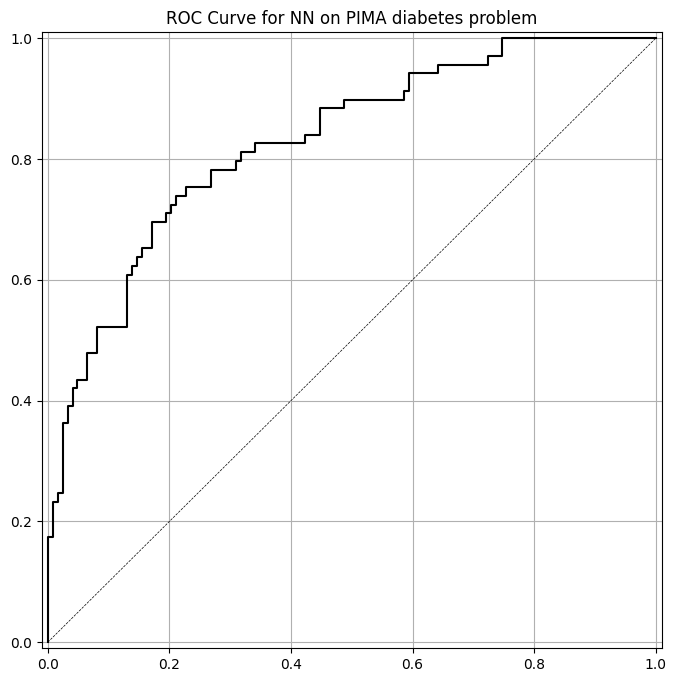

In [ ]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

 Plot the training loss and the validation loss over the different epochs and see how it looks

In [ ]:
run_hist_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

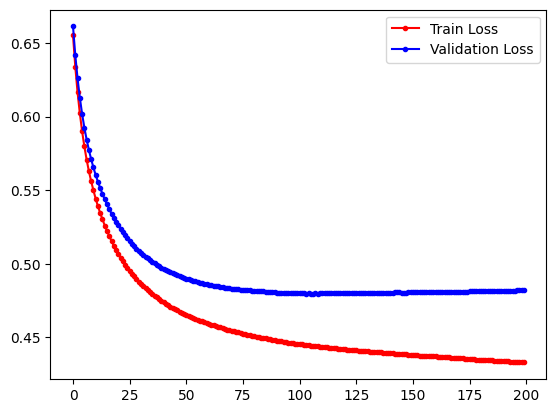

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

What is your interpretation about the result of the train and validation loss?

Based on the output of the plot, it shows that the based on the previous output the model performed well, however is performed poorly on the validation, which means that the data is overfitting.

#### Supplementary Activity

* Build a model with two hidden layers, each with 6 nodes
* Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
* Use a learning rate of .003 and train for 1500 epochs
* Graph the trajectory of the loss functions, accuracy on both train and test set
* Plot the roc curve for the predictions
* Use different learning rates, numbers of epochs, and network structures.
* Plot the results of training and validation loss using different learning rates, number of epocgs and network structures
* Interpret your result

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline

## Import Keras objects for Deep Learning
from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

In [ ]:
filepath = "/content/pima-indians-diabetes.csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)

print(diabetes_df.shape)
diabetes_df.sample(5)

X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

np.mean(y), np.mean(1-y)

normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

(768, 9)


In [ ]:
diabetes_df.dtypes

times_pregnant              int64
glucose_tolerance_test      int64
blood_pressure              int64
skin_thickness              int64
insulin                     int64
bmi                       float64
pedigree_function         float64
age                         int64
has_diabetes                int64
dtype: object

In [ ]:
#Build a model with two hidden layers, each with 6 nodes
#Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
model2 = Sequential([
    Dense(6, input_shape=(8,), activation="relu"),
    Dense(6, activation="relu"),
    Dense(1, activation="sigmoid")
])

In [ ]:
model2.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 6)                 54        
                                                                 
 dense_67 (Dense)            (None, 6)                 42        
                                                                 
 dense_68 (Dense)            (None, 1)                 7         
                                                                 
Total params: 103 (412.00 Byte)
Trainable params: 103 (412.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#Use a learning rate of .003 and train for 1500 epochs
model2.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_2 = model2.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1500)

Epoch 1/1500
18/18 [==============================] - 1s 19ms/step - loss: 0.6841 - accuracy: 0.5660 - val_loss: 0.6809 - val_accuracy: 0.5677
Epoch 2/1500
18/18 [==============================] - 0s 6ms/step - loss: 0.6697 - accuracy: 0.6354 - val_loss: 0.6697 - val_accuracy: 0.6406
Epoch 3/1500
18/18 [==============================] - 0s 6ms/step - loss: 0.6576 - accuracy: 0.6753 - val_loss: 0.6604 - val_accuracy: 0.6510
Epoch 4/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.6474 - accuracy: 0.6858 - val_loss: 0.6525 - val_accuracy: 0.6771
Epoch 5/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.6384 - accuracy: 0.7031 - val_loss: 0.6455 - val_accuracy: 0.6979
Epoch 6/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.6305 - accuracy: 0.6997 - val_loss: 0.6392 - val_accuracy: 0.7083
Epoch 7/1500
18/18 [==============================] - 0s 3ms/step - loss: 0.6232 - accuracy: 0.7031 - val_loss: 0.6334 - val_accuracy: 0.6927
Epoch

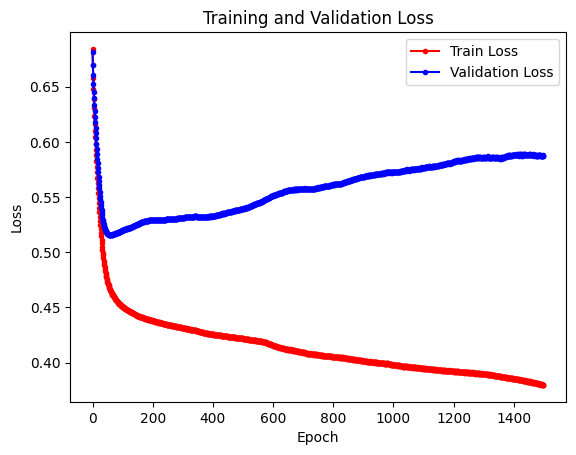

In [ ]:
plt.plot(run_hist_2.history["loss"], 'r', marker='.', label="Train Loss")
plt.plot(run_hist_2.history["val_loss"], 'b', marker='.', label="Validation Loss")
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Remarks:** Based on the result the model overfitted in greater epochs which resulted a good performance model but underperformed in validation test.

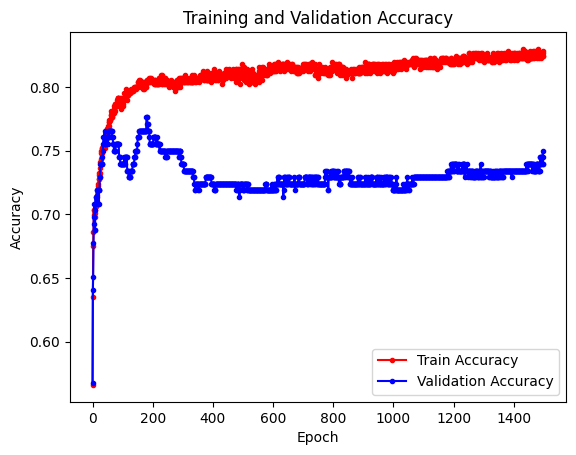

In [ ]:
plt.plot(run_hist_2.history["accuracy"], 'r', marker='.', label="Train Accuracy")
plt.plot(run_hist_2.history["val_accuracy"], 'b', marker='.', label="Validation Accuracy")
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
y_pred_prob = model2.predict(X_test_norm)
y_pred_class = (y_pred_prob > 0.5).astype(int)
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred_class)))

6/6 [==============================] - 0s 2ms/step
Accuracy: 0.740


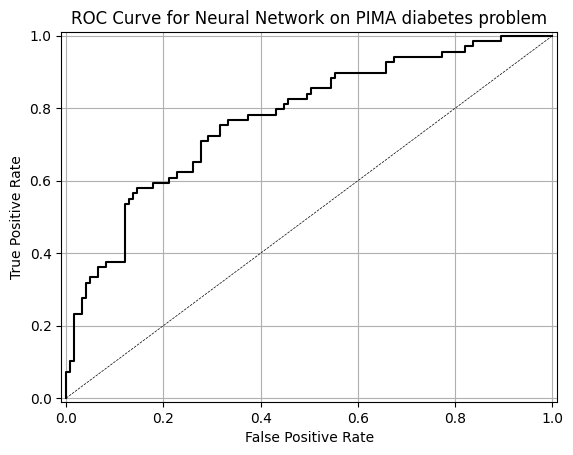

ROC-AUC score: 0.774


In [ ]:
fpr, tpr, thr = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, 'k-')
plt.plot([0, 1], [0, 1], 'k--', linewidth=0.5)  # ROC curve for random model
plt.grid(True)
plt.title('ROC Curve for Neural Network on PIMA diabetes problem')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.show()

print('ROC-AUC score: {:.3f}'.format(roc_auc_score(y_test, y_pred_prob)))



*   Use different learning rates, numbers of epochs, and network structures.
*   Plot the results of training and validation loss using different learning rates, number of epocgs and network structures
*   Interpret your result






In [ ]:
model3 = Sequential([
    Dense(6, input_shape=(8,), activation="relu"),
    Dense(6, activation="relu"),
    Dense(1, activation="sigmoid")
])

In [ ]:
model3.compile(SGD(lr = .01), "binary_crossentropy", metrics=["accuracy"])
run_hist_3 = model3.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=300)

Epoch 1/300
18/18 [==============================] - 1s 14ms/step - loss: 0.7827 - accuracy: 0.3594 - val_loss: 0.7523 - val_accuracy: 0.3802
Epoch 2/300
18/18 [==============================] - 0s 5ms/step - loss: 0.7581 - accuracy: 0.3681 - val_loss: 0.7340 - val_accuracy: 0.4271
Epoch 3/300
18/18 [==============================] - 0s 4ms/step - loss: 0.7391 - accuracy: 0.3819 - val_loss: 0.7196 - val_accuracy: 0.4583
Epoch 4/300
18/18 [==============================] - 0s 4ms/step - loss: 0.7241 - accuracy: 0.4306 - val_loss: 0.7081 - val_accuracy: 0.5052
Epoch 5/300
18/18 [==============================] - 0s 4ms/step - loss: 0.7118 - accuracy: 0.5000 - val_loss: 0.6989 - val_accuracy: 0.5417
Epoch 6/300
18/18 [==============================] - 0s 4ms/step - loss: 0.7019 - accuracy: 0.5729 - val_loss: 0.6915 - val_accuracy: 0.5625
Epoch 7/300
18/18 [==============================] - 0s 4ms/step - loss: 0.6936 - accuracy: 0.6042 - val_loss: 0.6854 - val_accuracy: 0.5885
Epoch 8/300


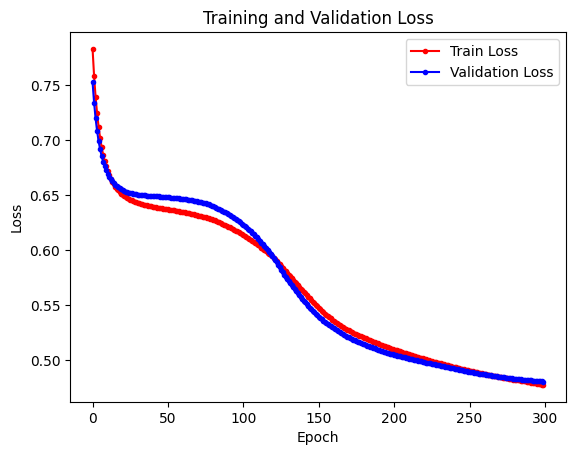

In [ ]:
plt.plot(run_hist_3.history["loss"], 'r', marker='.', label="Train Loss")
plt.plot(run_hist_3.history["val_loss"], 'b', marker='.', label="Validation Loss")
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

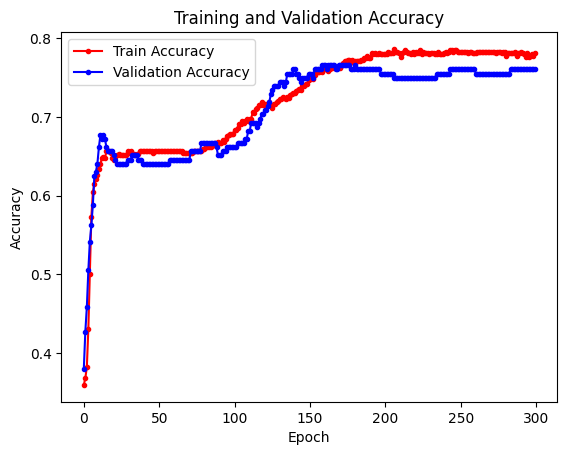

In [ ]:
plt.plot(run_hist_3.history["accuracy"], 'r', marker='.', label="Train Accuracy")
plt.plot(run_hist_3.history["val_accuracy"], 'b', marker='.', label="Validation Accuracy")
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
y_pred_prob = model3.predict(X_test_norm)
y_pred_class = (y_pred_prob > 0.5).astype(int)
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred_class)))

6/6 [==============================] - 0s 3ms/step
Accuracy: 0.760


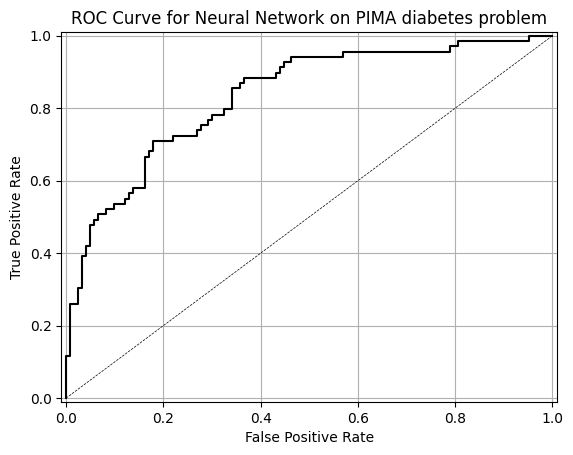

ROC-AUC score: 0.834


In [ ]:
fpr, tpr, thr = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, 'k-')
plt.plot([0, 1], [0, 1], 'k--', linewidth=0.5)  # ROC curve for random model
plt.grid(True)
plt.title('ROC Curve for Neural Network on PIMA diabetes problem')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.show()

print('ROC-AUC score: {:.3f}'.format(roc_auc_score(y_test, y_pred_prob)))

#### Conclusion

In conclusion performing the activity of training neural networks, shows different behavior of the result depending on the number of hidden layers, nodes, learning rates, and epochs, upon observing each output the more epochs it runs the more the data somewhat learns overtime, however it produces a greater overfitting result if its too much.